In [47]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [70]:
def heatmap_from_metric(metric, metric_name):
  plt.imshow(metric)
  cbar = plt.colorbar()
  cbar.ax.get_yaxis().labelpad = 15
  cbar.ax.set_ylabel(metric_name, rotation=270)
  ticks = list(range(0, 10, 2))
  tick_labels = list(range(2012, 2022, 2))
  plt.xticks(ticks=ticks, labels=tick_labels)
  plt.yticks(ticks=ticks, labels=tick_labels)
  plt.tight_layout()
  plt.show()

In [49]:
def display_topics(model, feature_names, no_top_words):
  for topic_idx, topic in enumerate(model.components_):
    print("Topic " + str(topic_idx) + ": " + \
          " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [50]:
def get_topics(documents, no_topics, no_features):
  # LDA can only use raw term counts for LDA because it is a probabilistic graphical model
  tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
  tf = tf_vectorizer.fit_transform(documents)
  tf_feature_names = tf_vectorizer.get_feature_names_out()

  # Run LDA
  lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online',
                                  learning_offset=50., random_state=0).fit(tf)
  return lda, tf_feature_names

In [54]:
with open("../../WMTdata/token_splits/tokens_2020_25000000.txt", "r") as text_file:
  documents = text_file.readlines()[0].split("<s>")

model, tf_feature_names = get_topics(documents, no_topics=20, no_features=1000)
display_topics(model, tf_feature_names, no_top_words=50)

Topic 0: said study vaccine university dr research test people health researchers data testing disease risk scientists professor new tests results drug use human symptoms science virus likely blood used team published evidence high according treatment experts covid important based help different 19 early potential body infection information positive levels time lead
Topic 1: trump president biden election house campaign democratic white said vote donald senate democrats voters republican presidential joe state administration political states party republicans american new americans sanders obama national voting vice candidate country washington debate news congress america 2016 tuesday race day support win won 2020 week november supporters primary
Topic 2: mr image ms said caption copyright bbc images getty people added media says told 000 staff help taken scotland described chief new year coronavirus called wales james saying mark did seen uk paul work speaking centre weeks left asked

In [55]:
num_years = 10
no_topics = 20
no_features = 1000
no_top_words = 50

topic_words = np.empty((num_years, no_topics, no_top_words), dtype=object)

for i in tqdm(range(num_years)):
  with open("../../WMTdata/token_splits/tokens_" + str(2012 + i) + "_25000000.txt", "r") as text_file:
    documents = text_file.readlines()[0].split("<s>")

  model, tf_feature_names = get_topics(documents, no_topics=no_topics, no_features=no_features)
  for topic_idx, topic in enumerate(model.components_):
    feature_names = [tf_feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    topic_words[i][topic_idx] = np.array(feature_names)

100%|██████████| 10/10 [12:19<00:00, 73.98s/it]


In [68]:
num_intersections = np.zeros((num_years, num_years))

for i in range(num_years):
  for j in range(num_years):
    num_intersections[i][j] = len(np.intersect1d(topic_words[i], topic_words[j]))

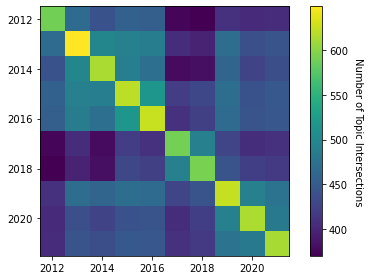

In [71]:
heatmap_from_metric(num_intersections, "Number of Topic Intersections")

In [59]:
np.save("./num_topic_intersections", num_intersections)
np.save("./topic_words", topic_words)

In [83]:
np.set_printoptions(threshold=np.inf)
for i in range(0, 10):
  print(str(2012 + i) + " ---------------------------------------")
  print(topic_words[i][:10][:, :10])
np.set_printoptions(threshold=1000)

2012 ---------------------------------------
[['law' 'court' 'health' 'care' 'federal' 'states' 'rights' 'government'
  'state' 'supreme']
 ['food' 'space' 'water' 'says' 'air' 'home' 'com' 'flight' 'hotel'
  'like']
 ['said' 'women' 'years' 'judge' 'case' 'court' 'family' 'drug' 'year'
  'trial']
 ['like' 'said' 'just' 'time' 'people' 'don' 'think' 'know' 'way' 'going']
 ['said' 'police' 'people' 'killed' 'year' 'man' 'told' 'authorities'
  'old' 'syrian']
 ['school' 'students' 'children' 'college' 'schools' 'university'
  'education' 'student' 'parents' 'high']
 ['percent' 'year' 'said' 'rate' 'economy' 'bank' 'market' 'growth'
  'prices' 'billion']
 ['china' 'facebook' 'new' 'said' 'apple' 'online' 'chinese' 'google'
  'internet' 'site']
 ['oil' 'european' 'said' 'world' 'energy' 'london' 'union' 'europe'
  'british' 'france']
 ['north' '000' 'south' 'said' 'park' 'storm' 'miles' 'car' 'coast'
  'west']]
2013 ---------------------------------------
[['like' 'just' 'time' 'don' 'thin